# DATAMADNESS 

## Group 21

Members:
* Csongor Kocsis
* Luc Meels
* Roman Nekrasov

#### Link to video:
https://www.youtube.com/watch?v=89eu7zDx3WA


### Dataset
The dataset contains call information from the IT department at Waterleiding Maatschappij Limburg.
The dataset is accurate and rich enough for our research project and provided by the operators working with these calls each day. It gives a good representation on how an IT desk processes incoming inquiries with a lot of useful information such as call type, duration, different dates specific for the calls (registration, completion, target), department, category, subcategory, etc.

### Ethical consideration
The dataset we used is from Waterleiding Maatschappij Limburg NV, the tapwater supplier for Limburg. One of the groupmembers currently works at this company and got written approval to use the dataset for research purposes. Any sensitive data already has been removed before the start of the explanatory data analysis.
The dataset does not contain any informatian about employees and the unique identifier fields are not used. In the dataset we are using the call cannot be traced back to the original call containg the sensitive information.

The limitations consider the ethical aspect is that we could not use any call titles or descriptions. This contains specific information of a call and could possible be used for a NLP model for a classification or regression model of the workload of a call. A possible classification model could have been categorization of a call such that employees do not have to this manually and another possibility could have been using the employee name for a more accurate regression model on employee level.

The stakeholder is the IT department of the tapwater supplier, they could possibly use this for optimizing their customer support operation.

In [57]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import pandas.util.testing as tm

import seaborn as sns
import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

pd.options.mode.chained_assignment = None

### Import data

In [2]:
df = pd.read_excel('DatasetEN.xlsx',index_col=0) #load data
df

(49028, 22)


,Status,Target date,Closed,Category,Subcategory,Call Type,Department,Call Date,Number of days current,Department.1,...,Time spent for Second Line,Date/time of creation,Date/time of change,Closure Date,Completion Date,Duration,Actual duration,Escalated,Major call,Entry
Line,,,,,,,,,,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,True,ICT SAP,SD (Verkoop),ICT Verstoring,NaN,2013-11-22 08:54:00,288,Klantenservice - Klantenservice-A - K&O,...,00:00:00,2013-11-22 08:54:34,2015-01-15 13:14:12,2015-01-15 13:14:00,2015-01-15 13:14:00,2 uur,1900-05-22 09:20:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-09-18 11:52:00,True,ICT GIS,Smallworld NRM,ICT Verstoring,NaN,2014-06-04 11:52:00,322,Aanleg Leidingen - Aansluitleidingen - K&O,...,00:00:00,2014-06-04 11:52:15,2015-09-10 12:52:18,2015-09-10 12:52:00,2015-09-10 12:52:00,5 dagen,1900-06-08 09:30:00,True,NaN,E-mail
Second line call,Afgehandeld,2016-12-30 18:00:00,True,ICT GIS,Arcgis,ICT Verstoring,NaN,2014-07-21 15:15:00,183,NaN,...,00:00:00,2014-07-21 15:21:58,2015-04-08 07:57:11,2015-04-08 07:57:00,2015-04-08 07:57:00,5 dagen,1900-03-31 01:12:00,True,NaN,Telefonisch
Second line call,Afgehandeld,2015-07-17 15:45:00,True,ICT Infra,Netwerkverbinding,ICT Verstoring,NaN,2014-10-09 15:45:00,169,Productie - Centraal - K&O,...,00:00:00,2014-10-09 15:45:51,2015-06-16 14:28:58,2015-06-16 14:28:00,2015-06-16 14:28:00,5 dagen,1900-03-24 07:13:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-02-27 10:42:00,True,ICT Overige applicaties,Kijk op water,ICT Vraag,NaN,2014-10-20 10:42:00,75,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,...,00:00:00,2014-10-20 10:42:31,2015-02-05 09:10:00,2015-02-05 09:09:00,2015-02-05 09:09:00,5 dagen,1900-02-06 06:57:00,True,NaN,E-mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First line call,Omgezet naar wijziging,2021-03-15 07:58:00,True,ICT GIS,Smallworld NRM,ICT Service Request,K&O - Aanleg leidingen - HAL,2021-03-12 15:58:00,0,Aanleg leidingen - K&O,...,00:00:00,2021-03-12 15:58:11,2021-03-12 16:24:37,2021-03-12 16:24:00,2021-03-12 16:24:00,4 uur,00:26:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 10:32:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 10:32:51,2021-03-13 14:13:56,2021-03-13 14:13:00,2021-03-13 14:13:00,4 uur,00:00:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 12:22:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 12:22:56,2021-03-13 14:14:02,2021-03-13 14:14:00,2021-03-13 14:14:00,4 uur,00:00:00,False,NaN,E-mail


In [3]:
df.keys()

Index(['Status', 'Target date', 'Closed', 'Category', 'Subcategory',
       'Call Type', 'Department', 'Call Date', 'Number of days current',
       'Department.1', 'Operator Group', 'Time spent for First line',
       'Time spent for Second Line', 'Date/time of creation',
       'Date/time of change', 'Closure Date', 'Completion Date', 'Duration',
       'Actual duration', 'Escalated', 'Major call', 'Entry'],
      dtype='object')

In [4]:
df.shape

(49028, 22)

## EDA

### Filter important columns

Some of the collumns which are exported from the logging system aren't properly used to register calls so we only selected the significant ones.

In [5]:
df = df.reset_index()
df = df[['Line', 'Status', 'Target date','Category','Subcategory','Call Type','Department.1','Operator Group','Date/time of creation','Closure Date','Duration','Entry']]

In [6]:
oldsize = df.shape
oldsize

(49028, 12)

Create a column that represents the total duration of a call:

In [7]:
df['actual duration'] = df['Closure Date'] - df['Date/time of creation']

In [8]:
df.head()

,Line,Status,Target date,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry,actual duration
0,Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,ICT SAP,SD (Verkoop),ICT Verstoring,Klantenservice - Klantenservice-A - K&O,ICT ServiceDesk,2013-11-22 08:54:34,2015-01-15 13:14:00,2 uur,E-mail,419 days 04:19:26
1,Second line call,Afgehandeld,2015-09-18 11:52:00,ICT GIS,Smallworld NRM,ICT Verstoring,Aanleg Leidingen - Aansluitleidingen - K&O,ICT ServiceDesk,2014-06-04 11:52:15,2015-09-10 12:52:00,5 dagen,E-mail,463 days 00:59:45
2,Second line call,Afgehandeld,2016-12-30 18:00:00,ICT GIS,Arcgis,ICT Verstoring,NaN,ICT Technisch beheer,2014-07-21 15:21:58,2015-04-08 07:57:00,5 dagen,Telefonisch,260 days 16:35:02
3,Second line call,Afgehandeld,2015-07-17 15:45:00,ICT Infra,Netwerkverbinding,ICT Verstoring,Productie - Centraal - K&O,ICT Technisch beheer,2014-10-09 15:45:51,2015-06-16 14:28:00,5 dagen,E-mail,249 days 22:42:09
4,Second line call,Afgehandeld,2015-02-27 10:42:00,ICT Overige applicaties,Kijk op water,ICT Vraag,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,ICT Technisch beheer,2014-10-20 10:42:31,2015-02-05 09:09:00,5 dagen,E-mail,107 days 22:26:29


In [9]:
df.keys()

Index(['Line', 'Status', 'Target date', 'Category', 'Subcategory', 'Call Type',
       'Department.1', 'Operator Group', 'Date/time of creation',
       'Closure Date', 'Duration', 'Entry', 'actual duration'],
      dtype='object')

### Remove categorical entries that are not sufficiently represented in the dataset:

In [10]:
df.dtypes

Line                              object
Status                            object
Target date               datetime64[ns]
Category                          object
Subcategory                       object
Call Type                         object
Department.1                      object
Operator Group                    object
Date/time of creation     datetime64[ns]
Closure Date              datetime64[ns]
Duration                          object
Entry                             object
actual duration          timedelta64[ns]
dtype: object

Describe the categorical variables

In [11]:
df[['Status', 'Category', 'Subcategory', 'Call Type',
       'Department.1', 'Operator Group','Duration', 'Entry','Line']].describe()

,Status,Category,Subcategory,Call Type,Department.1,Operator Group,Duration,Entry,Line
count,49028,49028,49028,49028,41778,49028,49028,49028,49028
unique,5,29,200,24,76,10,9,9,2
top,Afgehandeld,ICT Infra,-,ICT Vraag,ICT - ICT Services & Infra - BO,ICT ServiceDesk,2 uur,E-mail,First line call
freq,30171,11714,10551,18581,2977,44450,34191,27559,38507


<AxesSubplot:>

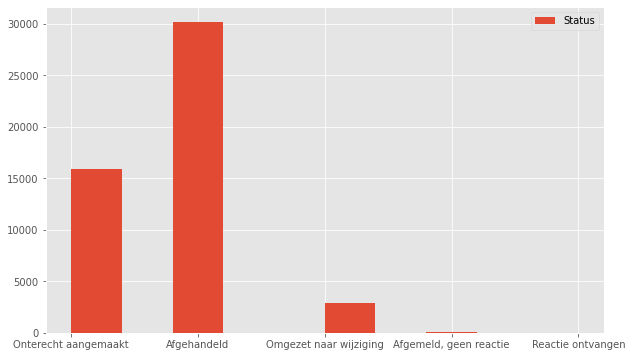

In [12]:
status_type = df['Status']
status_type.hist(legend = bool)

Only 'afgehandeld' (=closed) is relevant. 'onterecht aangemaakt' (=created incorrectly) is mostly automatic logging or wrong mails and the calls are not processed. 'Omgezet naar wijziging' (=converted to change) calls are also not processed but converted to a change, changes is a different domain.

In [13]:
df = df[df["Status"].str.contains("Afgehandeld", case = False)]
df.shape

(30171, 13)

Perform similar cleaning on other categorical features

In [14]:
#remove call with a category type that is not properly represented
category_type = df['Category']
category_type.value_counts()
g = df.groupby('Category')
df = g.filter(lambda x: len(x) > 10)

#do the same for subcategory
category_type = df['Subcategory']
category_type.value_counts()
g = df.groupby('Subcategory')
df = g.filter(lambda x: len(x) > 10)

#remove call type instances
call_type = df['Call Type']
call_type.value_counts()
g = df.groupby('Call Type')
df = g.filter(lambda x: len(x) > 10)


#remove department type instances
department_type = df['Department.1']
department_type.value_counts()
g = df.groupby('Department.1')
df = g.filter(lambda x: len(x) > 10)

#remove poor represented operator groups
operator_type = df['Operator Group']
operator_type.value_counts()
g = df.groupby('Operator Group')
df = g.filter(lambda x: len(x) > 10)

df.shape

(27038, 13)

We decided to remove instances that contain a unique category that, in other words categories that contain less than 10 instances. In the company there have been several changes over the years and could explain why some of these category types are not used often/anymore and that is why we decided to remove them. 

#### We look specifically at the entry types because it relates to one of our research questions

In [15]:
entry_type = df['Entry']
entry_type.value_counts()

Telefonisch           13501
E-mail                 9354
Persoonlijk            2872
SelfServiceDesk        1020
Topdesk Formulier       247
Skype                    22
Zelf geconstateerd       14
FO-mail                   7
PA-mail                   1
Name: Entry, dtype: int64

<AxesSubplot:>

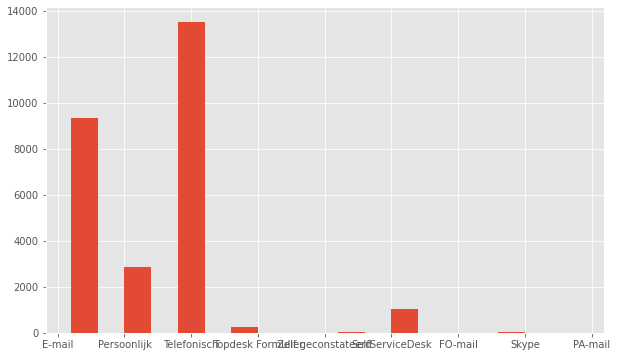

In [16]:
entry_type.hist(rwidth=0.5)

In [17]:
df = df[df["Entry"].str.contains("E-mail", case = False) | df["Entry"].str.contains("Telefonisch", case = False) | df["Entry"].str.contains("Persoonlijk", case = False)| df["Entry"].str.contains("SelfServiceDesk", case = False)]

In [18]:
print(oldsize)
print(df.shape)

(49028, 12)
(26747, 13)


We managed to filter out a lot of instances that are not sufficiently represented. There are 4 entry types which are currently still in use and we have filtered them out.

### Remove outliers in the numeric data:

Describe the numeric variables

In [19]:
df[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration
count,26747,26747,26747,26747
mean,2017-12-31 09:02:23.304898304,2017-12-26 03:44:59.272110336,2017-12-29 23:29:13.375710208,3 days 19:44:14.103600405
min,2014-12-23 16:24:00,2014-06-04 11:52:15,2015-01-05 08:34:00,-1 days +21:04:19
25%,2016-05-25 18:20:30,2016-05-23 16:26:38,2016-05-25 08:45:30,-1 days +23:59:42
50%,2017-11-13 08:51:45,2017-11-07 08:01:06,2017-11-09 14:32:00,0 days 00:18:22
75%,2019-08-29 15:38:00,2019-08-20 09:34:57,2019-08-28 09:09:30,0 days 08:43:23.500000
max,2024-07-31 18:00:00,2021-03-12 13:48:20,2021-03-12 15:30:00,1653 days 02:58:58
std,NaN,NaN,NaN,26 days 15:00:39.565864100


Create a column that represent the duration as a numeric value instead of a date time value for easier analysis:

In [20]:
# df['actual duration seconds'] = df['actual duration'].apply(lambda x : x.total_seconds())
df['actual duration minutes'] = df['actual duration'].apply(lambda x : x.total_seconds()/60)

Since the employees are not working 24/7 we have to take the working hours into account. The it-employees are working in a timewindow from 7:30 - 17:00. Hence we decided to restrict the duration of calls to the working hours of employees  such that the time a call is open overnight is not taken into account.

In [21]:
minutes_working_hours = df.copy()
minutes_working_hours['actual duration'] = minutes_working_hours['actual duration'].astype(str)
new = minutes_working_hours['actual duration'].str.split(" ", n = 1, expand = True) 

minutes_working_hours['dayH'] = new[0]
minutes_working_hours

minutes_working_hours['dayH'] = minutes_working_hours['dayH'].astype(int)

# substract non working hours from duration minutes
minutes_working_hours.loc[(minutes_working_hours['actual duration minutes'] >= 870) , 'actual duration minutes actual'] = minutes_working_hours['actual duration minutes'] - minutes_working_hours['dayH']*870
minutes_working_hours.loc[(minutes_working_hours['actual duration minutes'] >= 870) & (minutes_working_hours['dayH'] == 0) , 'actual duration minutes actual'] = minutes_working_hours['actual duration minutes'] - 870
minutes_working_hours.loc[(minutes_working_hours['actual duration minutes'] > minutes_working_hours['dayH']*24*60 + 870), 'actual duration minutes actual'] = minutes_working_hours['actual duration minutes actual'] - 870
minutes_working_hours.loc[(minutes_working_hours['actual duration minutes'] < 870) , 'actual duration minutes actual'] = minutes_working_hours['actual duration minutes'] 

In [22]:
df['actual duration minutes'] = minutes_working_hours['actual duration minutes actual']

In [23]:
df[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration','actual duration minutes']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration,actual duration minutes
count,26747,26747,26747,26747,26747.000000
mean,2017-12-31 09:02:23.304898304,2017-12-26 03:44:59.272110336,2017-12-29 23:29:13.375710208,3 days 19:44:14.103600405,2164.296375
min,2014-12-23 16:24:00,2014-06-04 11:52:15,2015-01-05 08:34:00,-1 days +21:04:19,-869.466667
25%,2016-05-25 18:20:30,2016-05-23 16:26:38,2016-05-25 08:45:30,-1 days +23:59:42,-0.416667
50%,2017-11-13 08:51:45,2017-11-07 08:01:06,2017-11-09 14:32:00,0 days 00:18:22,11.566667
75%,2019-08-29 15:38:00,2019-08-20 09:34:57,2019-08-28 09:09:30,0 days 08:43:23.500000,170.541667
max,2024-07-31 18:00:00,2021-03-12 13:48:20,2021-03-12 15:30:00,1653 days 02:58:58,942388.966667
std,NaN,NaN,NaN,26 days 15:00:39.565864100,15182.104304


Plot the distribution of the duration:
Remove the outliers in duration

In [24]:
df['Line_Type_num'] = df['Line'].str.contains('Second line call').astype(int)

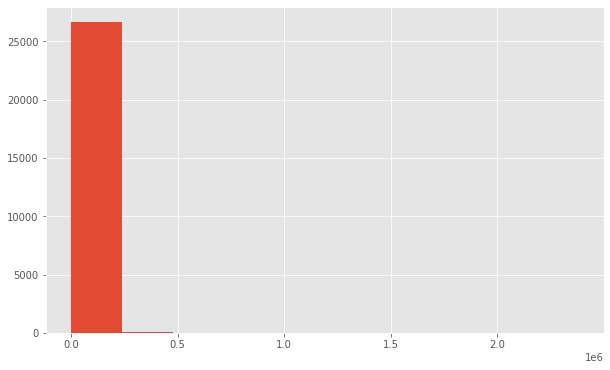

(26747, 15)


In [25]:
df['actual duration'].astype('timedelta64[m]').hist()
plt.show()

#sns.displot(df['actual duration minutes'], label = df['Line'], kde= False)
print(df.shape)



We have to remove some faulty registered data with negative time duration. Also there are a few outliers in terms of duration as can be seen in the histogram. We have chosen to only take in account calls that have a duration from 0 to 30 days, because most calls open after 30 days should have been closed earlier but are forgotten. 

In [26]:
df = df[df['actual duration']>pd.Timedelta(0,'s')]
df = df[df['actual duration']< pd.Timedelta(30,'d')]
df[['Target date', 'Date/time of creation', 'Closure Date', 'actual duration']].describe(datetime_is_numeric=True)

,Target date,Date/time of creation,Closure Date,actual duration
count,17112,17112,17112,17112
mean,2018-02-11 01:31:46.690743040,2018-02-06 22:51:37.627222784,2018-02-09 02:30:40.807692032,2 days 03:39:03.180458158
min,2014-12-23 16:24:00,2014-12-11 15:29:22,2015-01-05 08:53:00,0 days 00:00:01
25%,2016-07-29 18:12:45,2016-07-27 04:42:07.500000,2016-07-28 15:32:30,0 days 00:17:54
50%,2018-01-22 11:01:30,2018-01-16 16:04:40,2018-01-19 11:59:30,0 days 01:27:32.500000
75%,2019-09-26 22:33:45,2019-09-21 06:21:36.750000128,2019-09-24 21:16:45,1 days 19:14:12
max,2021-03-31 19:00:00,2021-03-12 10:52:30,2021-03-12 15:30:00,29 days 23:46:26
std,NaN,NaN,NaN,4 days 14:44:53.460891384


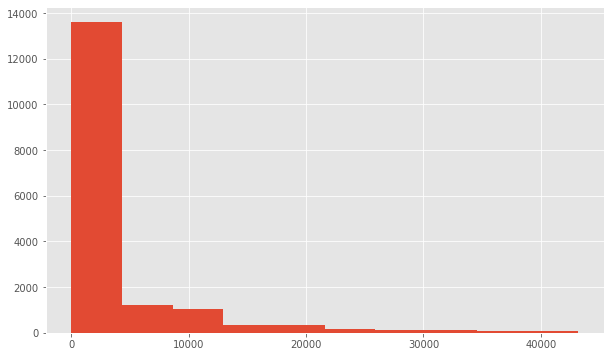

(17112, 15)


In [27]:
df['actual duration'].astype('timedelta64[m]').hist()
plt.show()

#sns.displot(df['actual duration minutes'], label = df['Line'], kde= False)
print(df.shape)

Now the outliers are removed and you can clearly see a better distribution of the call duration.

### Q1: Does the workload vary depending on time of year/ time of the month / day of the week /hour of the day?

#### Time series analysis

Check if there is some change in duration of calls over time

In [28]:
after2014 = df[df["Date/time of creation"]>=np.datetime64('2015-01-01')]

<AxesSubplot:xlabel='Date/time of creation'>

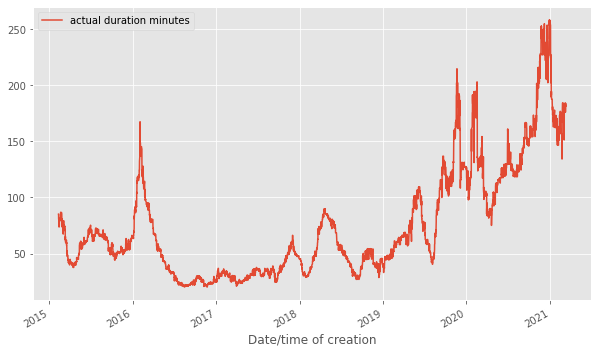

In [29]:
after2014[["Date/time of creation","actual duration minutes"]].set_index("Date/time of creation").rolling(365).median().plot()

#### There seems to be a increase in call durations over the years, but the amount of incoming calls seems the same.
We averaged the times series over a window to get a general trend of the years. The increase in duration could be due to changes in company policy. To fully answer our research question we are going to look into the amount of incoming calls over different parts of the day.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 365  # yearly seasonality
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("Date/time of creation")['actual duration minutes'].interpolate("linear"),
    freq=decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

<ipython-input-31-dfc83eacdfde>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(


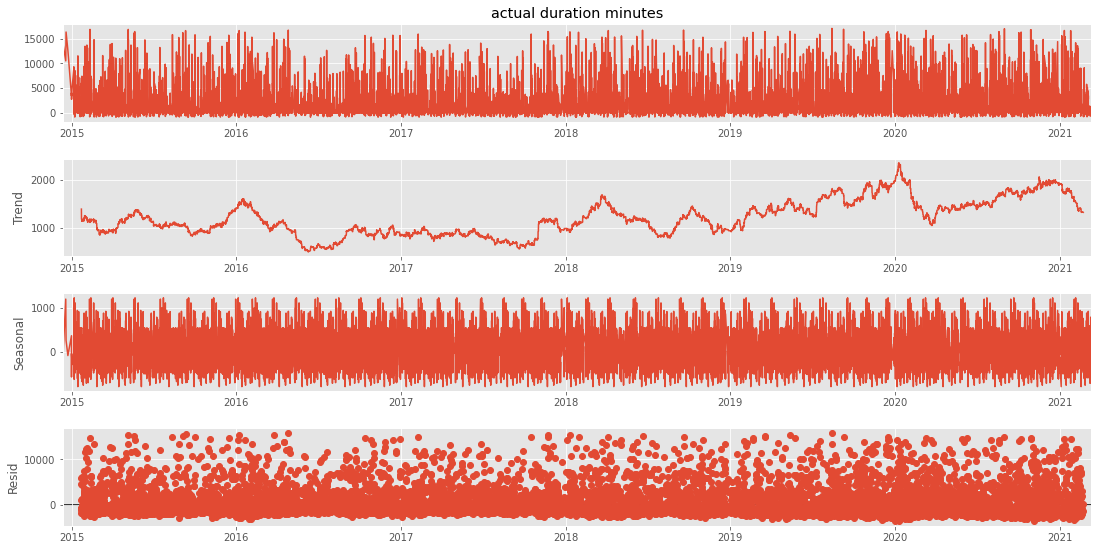

In [32]:
fig = decomposition.plot()
fig.set_size_inches(16, 8)


It is not possible to see any seasonality in terms of duration of calls, hence we are going to use a different approach to define the workload. 

#### We will count the amount of incoming calls for a given period and use this as a measurement of the workload.

In [33]:
df['creation hour of day'] = df['Date/time of creation'].dt.hour
df['monthly incoming'] = df['Date/time of creation'].dt.month
df['creation day of week'] = df['Date/time of creation'].dt.weekday
df['creation day of year'] = df['Date/time of creation'].dt.isocalendar().week


The following plot shows at which hours of the day the most calls are incomming. The calls are selected based on entry type to see if there are difference in workload depending on the entrytype of a call

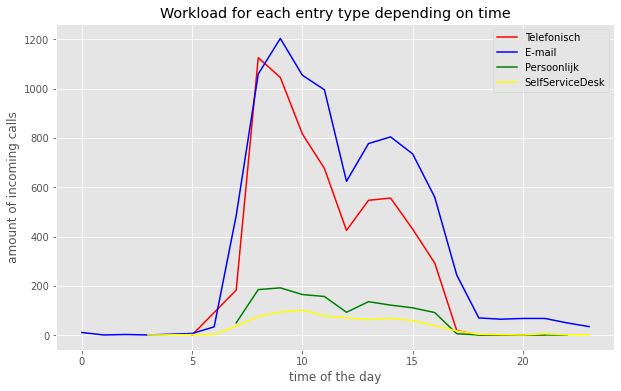

In [34]:
entrycount = df['Entry'].nunique()
entrytypes = df['Entry'].unique()
color = ['red', 'blue', 'green', 'yellow']

for i in range(entrycount):
    subdf = df[df['Entry']==entrytypes[i]]
    
    subdf_count = subdf.groupby('creation hour of day')
    subdf_count = subdf_count.count()
    plt.plot(subdf_count['Line'], label = entrytypes[i], color=color[i])

plt.xlabel('time of the day')
plt.ylabel('amount of incoming calls')
plt.title('Workload for each entry type depending on time')
plt.legend()

You can clearly see the working hours of the employees within the company. You can also see that after a certain time (around lunch time) there is a decrease in the amount of incoming calls. Most calls are incoming by phone or e-mail however the ratio between these amounts does not seem to change overtime.

Text(0.5, 1.0, 'amount of incoming calls each month')

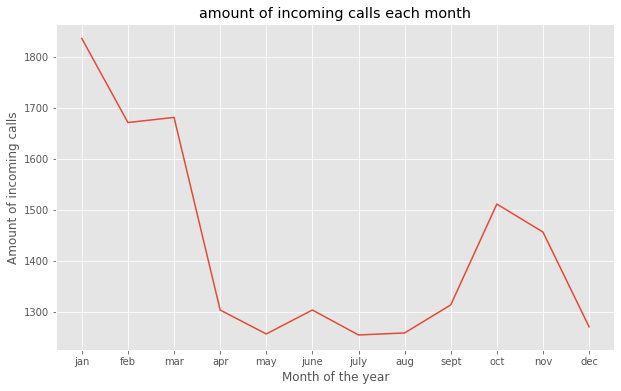

In [63]:
monthly_count = df.groupby('monthly incoming')
monthly_count = monthly_count.count()
plt.plot(monthly_count['Line'])
plt.xlabel('Month of the year')
plt.xticks(labels=['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov', 'dec'],ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('Amount of incoming calls')
plt.title('amount of incoming calls each month')

You can clearly see that in the beginning and end of the year, there are more incoming calls then in the middle of the year. This could be explained that during the summer more people are on holidays, but it is good to know that especially at the start of the year to schedule more employees to handle the extra workload.

Text(0.5, 1.0, 'amount of incoming calls each week of the year')

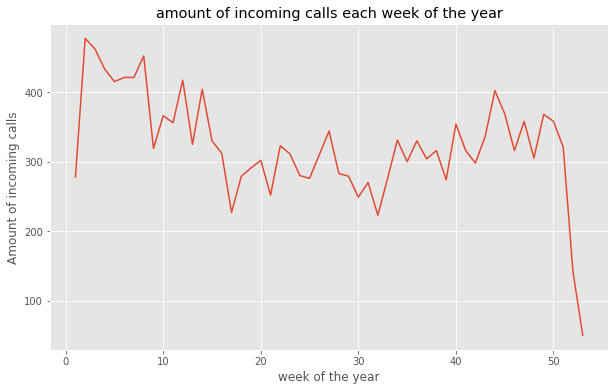

In [36]:
yearly_count = df.groupby('creation day of year')
yearly_count = yearly_count.count()

plt.plot(yearly_count['Line'])
plt.xlabel('week of the year')
plt.ylabel('Amount of incoming calls')
plt.title('amount of incoming calls each week of the year')

Similar results can be seen when the data is grouped by the amount of weeks in a year, however it is not as strong compared to when looking at the monthly relationship.

Text(0.5, 1.0, 'amount of incoming calls each weekday')

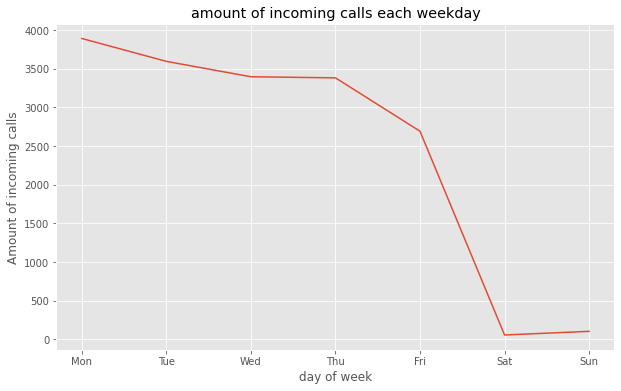

In [64]:
weekly_count = df.groupby('creation day of week')
weekly_count = weekly_count.count()
plt.plot(weekly_count['Line'])
plt.xlabel('day of week')
plt.ylabel('Amount of incoming calls')
plt.xticks(labels=['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'],ticks=[0,1,2,3,4,5,6])
plt.title('amount of incoming calls each weekday')

At the start of the week most calls are incoming, on friday it already drops because people go home early and in the weekend there are almost no incoming calls.

#### Now we implement a time series analysis to find a seasonality based on the workload

In [38]:
#round the dates to hours
df['Date/time of creation rounded']= df['Date/time of creation'].dt.round("D")
# df['Date/time of creation rounded']= df['Date/time of creation'].dt.isocalendar().round("D")

time_series_df = df.groupby('Date/time of creation rounded').count()

time_series_df


,Line,Status,Target date,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry,actual duration,actual duration minutes,Line_Type_num,creation hour of day,monthly incoming,creation day of week,creation day of year
Date/time of creation rounded,,,,,,,,,,,,,,,,,,,
2014-12-12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-12-13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-12-19,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2014-12-23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-12-31,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2021-03-09,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2021-03-10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


Notice that the stepsize of the indices are not consistent since we used a group by clause, therefore we decided to make the stepsize consistent and for each step that is missing we set the amount of calls to 0 since there were no calls received at that time.

In [39]:
plotdf = pd.DataFrame(pd.date_range(start='2014-12-11', end='2021-03-13', freq='D'), columns=["Date/time of creation rounded"])
plotdf['Line'] = np.zeros(len(plotdf))
plotdf = plotdf.set_index(plotdf["Date/time of creation rounded"], drop=True)

plotdf['Line'].loc[time_series_df.index] = time_series_df['Line']

plotdf = plotdf.drop(["Date/time of creation rounded"], axis=1)


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 30  # daily seasonality
model = 'additive'
decomposition = seasonal_decompose(
    plotdf['Line'].interpolate("linear"),
#     period = decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

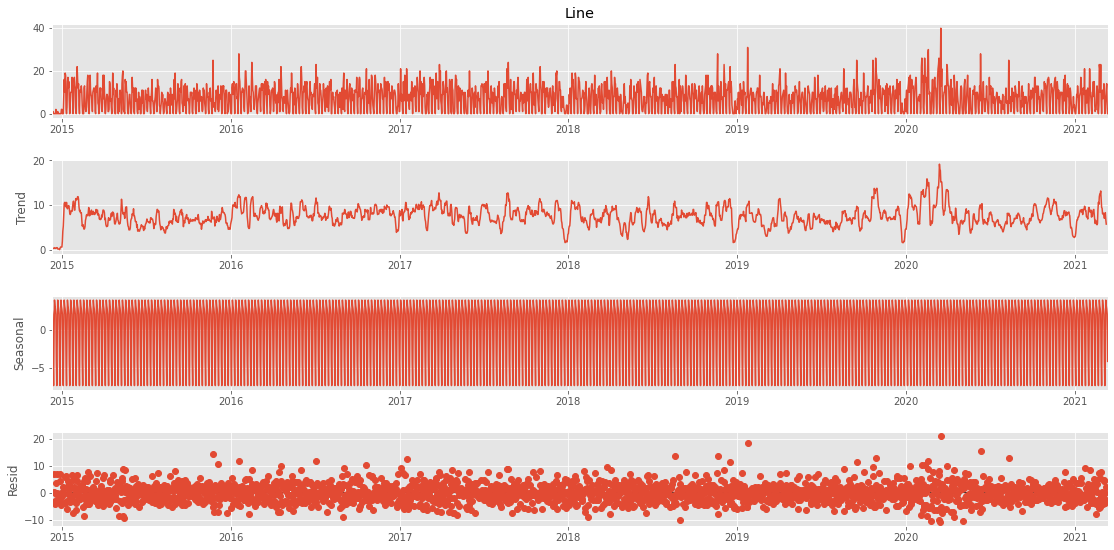

In [41]:
fig = decomposition.plot()
fig.set_size_inches(16, 8)

The seasonal trend is not visible because of the scale of the figure. Therefore a new figure is plotted on a better to scale for visualization.

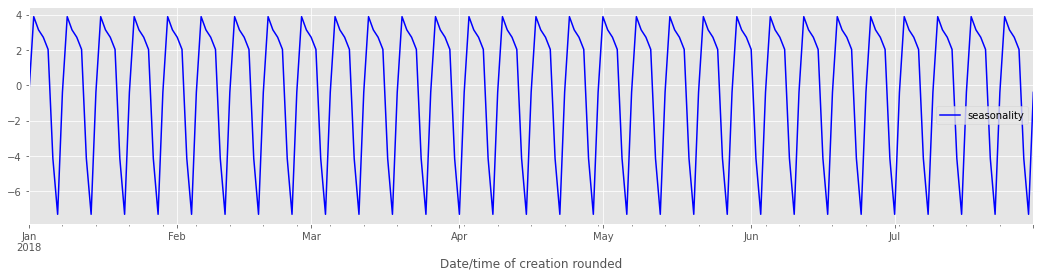

In [42]:
zoom_range = plotdf.reset_index()[(plotdf.reset_index()["Date/time of creation rounded"]>=np.datetime64('2018-01-01')) & (plotdf.reset_index()["Date/time of creation rounded"]<np.datetime64('2018-07-31'))].index
indices = plotdf.iloc[zoom_range]
indices = indices.index
fig, ax = plt.subplots(figsize=(18,4))
seasonal[indices].plot(ax=ax, label="seasonality", color="blue")
plt.legend()

Here the seem trend appears as in the weekday plot. You can see that at the beginning of the week the amount of calls is relatively high and it drops when getting closser to the end of the week.

## Q2: Are there variables which have a significant relation with the time it takes to solve a call?

We have made a regression model to see the significance of the entry type, (sub)category, the entry time, call type, operatour group and have used this to see if we could make a predicter to predict the duration of a call.

Most of these variables are categorical variables so we have used one hot encoding to represent the variables.

In [43]:
mregr = df.copy()
mregr = mregr[['Subcategory', 'Operator Group', 'Call Type', 'Entry','actual duration minutes',  'creation hour of day', 'creation day of week', 'Line_Type_num']]
mregr = pd.concat((mregr, pd.get_dummies(mregr['Subcategory'], drop_first=True)), axis=1)
mregr = pd.concat((mregr, pd.get_dummies(mregr['Operator Group'], drop_first=True)), axis=1)
mregr = pd.concat((mregr, pd.get_dummies(mregr['Call Type'], drop_first=True)), axis=1)
mregr = pd.concat((mregr, pd.get_dummies(mregr['Entry'], drop_first=True)), axis=1)
mregr.columns = mregr.columns.str.replace(' ', '_')
columns_mlr = mregr.loc[:, 'creation_hour_of_day':'Telefonisch'].columns
columns_mlr_adm = mregr.loc[:, 'actual_duration_minutes':'Telefonisch'].columns

Train test validation split function.

In [44]:
def train_test_split(df, n_samples=df.shape[0], validation=False):
    if validation:
        sample = df.sample(n=n_samples)

        msk = np.random.rand(len(sample)) < 0.8
        non_test = sample[msk]
        test = sample[~msk]
        
        msk = np.random.rand(len(non_test)) < 0.7
        train = non_test[msk]
        validation = non_test[~msk]
        
        return train, validation, test
    
    else:
        sample = df.sample(n=n_samples)

        msk = np.random.rand(len(sample)) < 0.8
        train = sample[msk]
        test = sample[~msk]
        
        return train, test
    
# reference: Jerrys notebook

In [45]:
from sklearn.linear_model import LinearRegression

train, validation, test = train_test_split(mregr[columns_mlr_adm], validation=True)

y_train = train['actual_duration_minutes'].values
y_val = validation['actual_duration_minutes'].values
y_test = test['actual_duration_minutes'].values

regression_model = LinearRegression(fit_intercept=True)

### Forward selection 
We have used forward selection to see which features are most important for the prediction and with how many features we can build a sufficient model.

In [46]:
all_predictors = columns_mlr

predictors = [([], 0)]

regression_model = LinearRegression(fit_intercept=True)

R_sq_fwd = []

for k in range(1, len(all_predictors)):
    best_k_minus_1 = predictors[-1][0]

    new_predictors = list(set(all_predictors) - set(best_k_minus_1))
    validation_R_sqs = []

    for predictor in new_predictors:

        k_predictors = best_k_minus_1 + [predictor]
        
        X_train = train[k_predictors].values
        X_val = validation[k_predictors].values
        
        if k == 1:
            X_train = X_train.reshape((len(X_train), 1))
            
        regression_model.fit(X_train, y_train)
        validation_R_sqs.append(regression_model.score(X_val, y_val))
    
    best_k = best_k_minus_1 + [new_predictors[np.argmax(validation_R_sqs)]]
    R_sq_fwd.append(np.max(validation_R_sqs))
    predictors.append((best_k, np.max(validation_R_sqs)))


X_train = train[all_predictors].values
X_val = validation[all_predictors].values  
regression_model.fit(X_train, y_train)

predictors.append((all_predictors, regression_model.score(X_val, y_val)))

In [47]:
best_predictor_set = sorted(predictors, key=lambda t: t[1])[-1]

X_train = train[best_predictor_set[0]].values
X_val = validation[best_predictor_set[0]].values  
X_test = test[best_predictor_set[0]].values  

regression_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))

print('best predictor set: {}\nvalidation R^2: {}\ntest R^2: {}'.format(best_predictor_set[0], best_predictor_set[1], regression_model.score(X_test, y_test)))

best predictor set: ['Line_Type_num', 'ICT_ServiceDesk', 'Smallworld_NRM', 'Smartphone', 'creation_day_of_week', 'SD_(Verkoop)', 'ICT_Service_Request', 'MAM_(Buitendienst)', 'AutoCad', 'Total_commander', 'ICT_Vraag', 'ICT_Wachtdienst', 'HCM_(HR_Module)', 'Kijk_op_water', 'Tablet', 'Outlook', 'Project', 'ICT_Team_Microsoft', 'FICO_(Fin._controle/boekh.)', 'Google_Chrome', 'Desktop', 'DWG_TrueView', 'Telefooncentrale', 'Persoonlijk', 'Excel', 'ICT_Verstoring', 'Internet_Explorer', 'Toetsenbord', 'Netwerkverbinding', 'Laptop', 'Citrix', 'Virusscanner', 'Raet_Benefit_Planner', 'BW_(Rapportagetool)', 'ICT_SAP_Functioneel_Applicatiebeheer', 'Acces', 'ReadWin', 'Arcgis', 'Teams', '>_Nieuwe_Applicatie', 'mijnWML', 'PrimoPDF', 'OMIS', 'Powerpoint', 'PS_(Projecten_module)', 'OneNote', 'SelfServiceDesk', 'Server', 'PA_-', 'PowerBI', 'Klic-viewer', 'CUA_(Aut._resetten_wachtw.)', 'ICT-Projecten', 'Internetsite_WML', 'SCCM', 'Windows_account_/_AD', 'Overige', 'WML_Lite', 'Thuiswerken', 'Dockingstati

We have an $R^2$ of around 0.27 on our test data which means that around 30% of the variability can be explained with the model. This seems quite low but there are a lot of human factors involved in registering the calls that can not be seen in the dataset and we are dealing with a lot of catogorical variables.

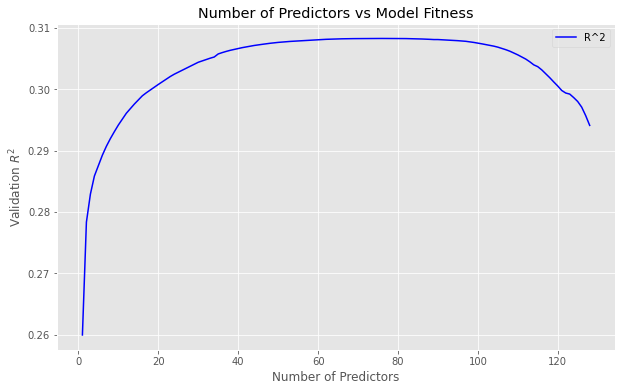

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(range(1, len(predictors)-1 ), R_sq_fwd, color='blue', label='R^2')

ax.set_title('Number of Predictors vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('Validation $R^2$')
ax.legend(loc='best')

plt.show()

We can see that the with the first couple of variables we already achieved almost the max $R^2$, this is line type and operator group. The more features added are not really improving the model in presence of the first two variables. Most of the predictors are from the onehot encoding of the categories and subcategories, this plot give the impression that these categories are not significant for the model since the $R^2$ does not increase by adding these features.

### Lasso regression
To compare the importance of variables we have used Lasso regression to see which features are significant.

In [49]:
from sklearn.preprocessing import scale 

train, test = train_test_split(mregr[columns_mlr_adm])

X_train = scale(train[columns_mlr].values)
X_test = scale(test[columns_mlr].values)

y_train = train['actual_duration_minutes'].values
y_test = test['actual_duration_minutes'].values



In [50]:
from sklearn.linear_model import Lasso
#not increasing the # of iterations, might give you a convergence warning
lasso_regression = Lasso(alpha=10, fit_intercept=True, max_iter=10000)
lasso_regression.fit(X_train, y_train)

print('Lasso regression model:\n {} + {}^T . x'.format(lasso_regression.intercept_, lasso_regression.coef_))

Lasso regression model:
 1217.853026013309 + [ 1.97571642e+01  1.22008284e+02  1.11396404e+03  1.91543361e+01
 -3.80226991e+01 -0.00000000e+00  0.00000000e+00 -8.74226324e+00
 -1.13557688e+01 -5.63065152e+01  4.67234445e+01  5.81440051e+00
  2.62556767e+01 -7.86788519e-01  2.27217372e+01  1.00984490e+01
 -5.47579891e+00 -2.34455418e+01 -2.54284121e+01  1.14495472e+01
 -3.07042380e+01 -4.85777993e+00  0.00000000e+00  0.00000000e+00
  5.42397754e+00 -1.86288939e+00  2.17524256e+01 -5.82171014e+01
 -3.35586836e+01 -0.00000000e+00  0.00000000e+00 -3.91775148e+01
 -3.50640037e+01 -0.00000000e+00  3.58328659e+01  1.51072397e+01
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.07601157e-01
  1.94555776e+01 -6.16233876e+01 -0.00000000e+00  2.36553031e+01
 -5.95597669e+01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.25252796e+01 -0.00000000e+00 -2.77028624e+01
 -2.10625857e+01 -9.54879017e+00  2.35639929e+01  1.68360594e+01
  6.67291736e+01  0.00000000e+00  0.00000000e

We can see that the Lasso regression set some coefficients to zero. These variables are from subcategories which are not significant for the model.

In [51]:
print('Train R^2: {}, test R^2: {}'.format(lasso_regression.score(X_train, y_train), 
                                           lasso_regression.score(X_test, y_test)))

Train R^2: 0.29626406094834745, test R^2: 0.26465911084751603


We can see a similar performance as with the normal multilinear regression.

In [52]:
reg_params = np.hstack((10.**np.arange(-5, 0), 10**np.arange(0, 10) + 0.01))

In [53]:
train_R_sq = []
test_R_sq = []

for reg in reg_params:
    lasso_regression = Lasso(alpha=reg, max_iter=100000, fit_intercept=True)
    lasso_regression.fit(X_train, y_train)
    
    train_R_sq.append(lasso_regression.score(X_train, y_train))
    test_R_sq.append(lasso_regression.score(X_test, y_test))

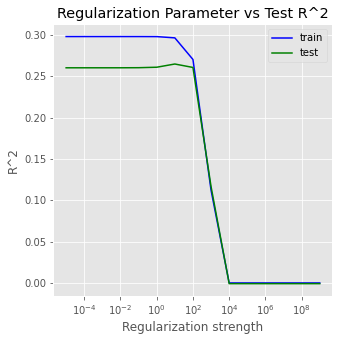

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(reg_params, train_R_sq, color='blue', label='train')
ax.plot(reg_params, test_R_sq, color='green', label='test')

ax.set_xscale('log')
ax.set_title('Regularization Parameter vs Test R^2')
ax.set_xlabel('Regularization strength')
ax.set_ylabel('R^2')
ax.legend(loc='best')

plt.show()

We can see that a low alpha gives better results with out model which means that our variables are showing some kind of significance to our model. However the explained variance is still not very high, there could be several explanations to this. It could be that the one hot encoding is not an optimal representation for these many categorical variables since a lot of new features are added to the model. A second and more plausible explanation is that the human factors for handling calls cannot be taken into account with the dataset we currently have and that it is therefore not possible to create a decent performing model.

## Q3: Which type/kind of calls are registered through phone/mail/personal?

To check if there is a difference in ratio with the categories and call type on the entry type of the call we have made some bar plots with our preprocessed data.

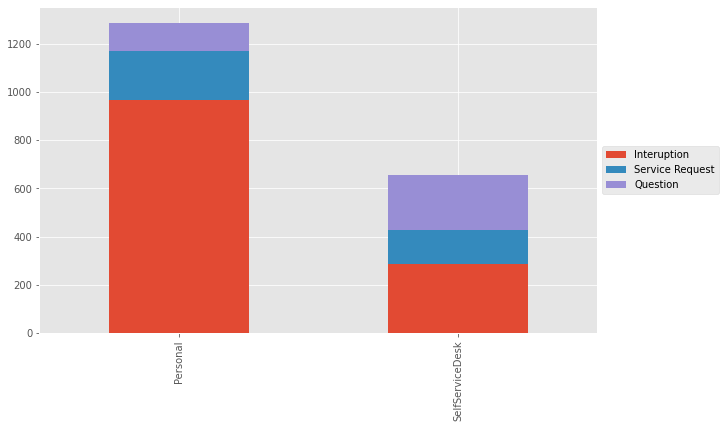

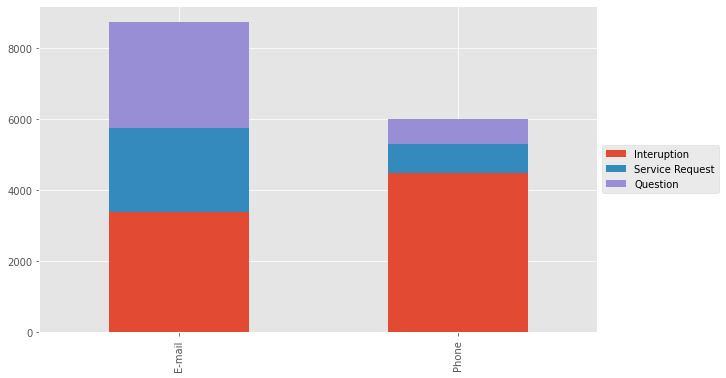

In [55]:
bar = pd.DataFrame({'Entry': df['Entry'], 'Call type': df['Call Type']}, index=df.index)
calltypes = df['Call Type'].unique()

dftemp = df
dftemp.loc[(df['Call Type'] == 'ICT Verstoring Intern') | (df['Call Type'] == 'ICT Verstoring Extern'), 'Call Type' ] = 'ICT Verstoring'

df1 = dftemp.loc[(df['Call Type'] == 'ICT Verstoring')]
df3 = dftemp.loc[(df['Call Type'] == 'ICT Service Request')]
df4 = dftemp.loc[(df['Call Type'] == 'ICT Vraag')]

dfVE = df1.groupby(['Entry']).count()['Line']
dfSR = df3.groupby(['Entry']).count()['Line']
dfVR = df4.groupby(['Entry']).count()['Line']

index = ['E-mail', 'Personal', 'SelfServiceDesk', 'Phone']
Interuption = dfVE.array
ServiceRQ = dfSR.array
Question = dfVR.array

bar = pd.DataFrame({'Interuption': Interuption, 'Service Request': ServiceRQ, 'Question': Question}, index=index)

plot1 = bar.loc[ ['Personal' , 'SelfServiceDesk'] , : ].plot.bar(stacked=True)
plot1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plot4 = bar.loc[ ['E-mail' , 'Phone'] , : ].plot.bar(stacked=True)
plot4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Call type
We can see that interuptions are taking up a big part of phone and personal registred calls. This could be due to the fact that employees are inclined to phone or walk in personal more quickly if their workflow is interupted than if they would have a simple question or a request.

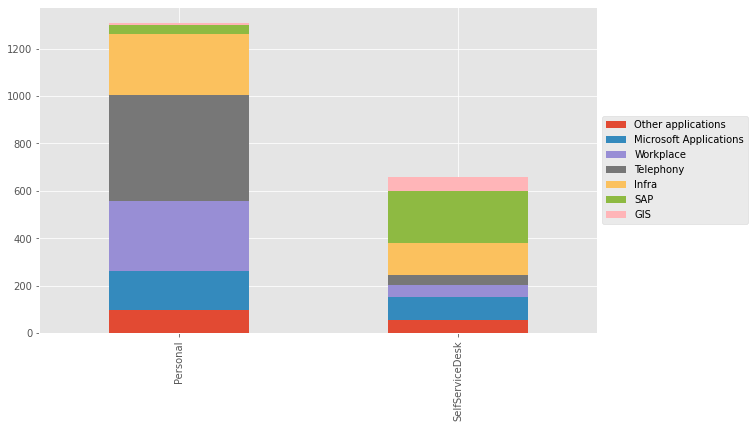

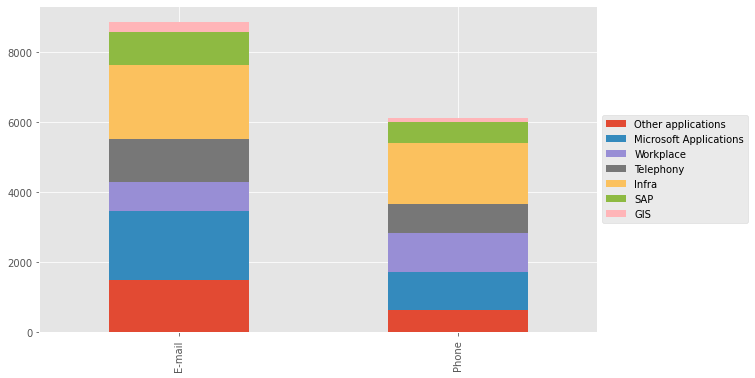

In [56]:
categories = df['Category'].unique()
categories

df5 = dftemp.loc[(df['Category'] == 'ICT Overige applicaties')]
df6 = dftemp.loc[(df['Category'] == 'ICT MS Applicaties')]
df7 = dftemp.loc[(df['Category'] == 'ICT Werkplek')]
df8 = dftemp.loc[(df['Category'] == 'ICT Telefonie')]
df9 = dftemp.loc[(df['Category'] == 'ICT Infra')]
df10 = dftemp.loc[(df['Category'] == 'ICT SAP')]
df11 = dftemp.loc[(df['Category'] == 'ICT GIS')]

dfOA = df5.groupby(['Entry']).count()['Line'].array
dfMS = df6.groupby(['Entry']).count()['Line'].array
dfWS = df7.groupby(['Entry']).count()['Line'].array
dfPH = df8.groupby(['Entry']).count()['Line'].array
dfIN = df9.groupby(['Entry']).count()['Line'].array
dfSA = df10.groupby(['Entry']).count()['Line'].array
dfGI = df11.groupby(['Entry']).count()['Line'].array

bar2 = pd.DataFrame({'Other applications': dfOA, 'Microsoft Applications': dfMS, 'Workplace': dfWS, 'Telephony': dfPH, 'Infra': dfIN, 'SAP': dfSA, 'GIS': dfGI}, index=index)
#plot2 = bar2.plot.bar(stacked=True)
#bar2

plot2 = bar2.loc[ ['Personal' , 'SelfServiceDesk'] , : ].plot.bar(stacked=True)
plot2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plot3 = bar2.loc[ ['E-mail' , 'Phone'] , : ].plot.bar(stacked=True)
plot3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# yes, this could have been nicer with a for loop :)

### Categories
We can see a quite similar distribution over all four of the entry types. A noticable observation that can be made is that calls regarding telephony (mostly company smartphones) are taking up a bigger part in the personal entry type compared to the others. This is probably due to the tacky explainability of smartphone issues and it's easier to explain/show personally.

### Final remarks

Looking at our first research question we found a trend in the duration of calls. The durations of a calls seems to be increasing over the years however the actual amount of calls did not change over time. There is a pattern in workload at the start of the week, more calls are received in the beginning and it drops when getting closer to the weekend. There is also a seasonal trend each year: The workload at the start and end of the year seems to be larger than in the middle. All this information could help the tapwater company with scheduling their employees to handle upcoming workload better.

When looking at our last research question we can conclude that people tend to use more personal communication methods for calls with high priority. Calls about interuptions of the systems are mostly handled personally or by phone, while general calls like questions are more often handled through e-mail or self-service desk.

Furthermore, we tried to see if there are variables in our dataset which have a relation with the duration it takes to solve a call. While seeing significance with numerous variables the $R^2$ we achieved with our regression models was roughly around 0.30. Our independent variables are not explaining much in the variation about the duration of a call, probably because of our limitations of almost only having to use categorical variables. The $R^2$ could possibly be improved by using other meaningful variables that were left out due to ethical considerations.

but
![image](https://64.media.tumblr.com/42ff6c8110f2865419a03c6eab4ab636/tumblr_nbrpnkql4V1tsunm8o2_400.gif)

